## Outline
- DataFrames
    - sorting & subsetting
    - creating new columns
- Aggregating Data
    - summary stattistics
    - counting
    - grouped summary statistics
- Slicing & indexing data
    - subsetting using slicing
    - indexes & subsetting using indexes
- Creating & Visualizing Data
    - plotting
    - handling missing values
    - reading data into DataFrame

- Pandas is built on NumPy and Matplotlib

## Tabular/ Rectangular Data

<img src = "./media/tabular_dataset.png" width = 500 height= 500>

## Pandas DataFrames

#### Loading the DataFrame

In [263]:
import pandas as pd

dogs = pd.read_csv('./dataset/dogs.csv')
dogs

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth
0,Bella,Labrador,Brown,56,25,2013-07-01
1,Charlie,Poodle,Black,43,23,2016-09-16
2,Lucy,Chow,Brown,46,22,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11
4,Max,Labrador,Black,59,29,2017-01-20
5,Stella,Chihuahua,Tan,18,2,2015-04-20
6,Bernie,St. Bernard,White,77,74,2018-02-2


#### Exploring a DataFrame: .head()

In [264]:
dogs.head()

,Name,Breed,Color,Height(cm),Weight(kg),Date of Birth
0,Bella,Labrador,Brown,56,25,2013-07-01
1,Charlie,Poodle,Black,43,23,2016-09-16
2,Lucy,Chow,Brown,46,22,2014-08-25
3,Cooper,Schnauzer,Gray,49,17,2011-12-11
4,Max,Labrador,Black,59,29,2017-01-20


#### Customizing a DataFrame: .columns , .rename()

In [265]:
dogs.columns

Index(['Name', 'Breed', ' Color', ' Height(cm)', ' Weight(kg)',
       ' Date of Birth'],
      dtype='object')

In [266]:
dogs.rename(columns = {'Name':'name',
                       'Breed':'breed',
                       ' Color' : 'color', 
                       ' Height(cm)': 'height_cm',
                       ' Weight(kg)' : 'weight_kg',
                       ' Date of Birth': 'date_of_birth'},
            inplace = True)
dogs.columns

Index(['name', 'breed', 'color', 'height_cm', 'weight_kg', 'date_of_birth'], dtype='object')

#### Exploring a DataFrame: .info()

In [267]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7 non-null      object
 1   breed          7 non-null      object
 2   color          7 non-null      object
 3   height_cm      7 non-null      int64 
 4   weight_kg      7 non-null      int64 
 5   date_of_birth  7 non-null      object
dtypes: int64(2), object(4)
memory usage: 464.0+ bytes


- Since the data type od the column `name` , `breed`, `color` is ***object*** which is not valid we have to convert it into specific one that is ***string***

### Converting the datatypes

In [268]:
dogs['name'] = dogs['name'].astype('string')
dogs['breed'] = dogs['breed'].astype('string')
dogs['color'] = dogs['color'].astype('string')
dogs['date_of_birth'] = pd.to_datetime(dogs['date_of_birth'])
dogs['date_of_birth'] = dogs['date_of_birth'].dt.strftime('%Y/%m/%d')

In [269]:
dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           7 non-null      string
 1   breed          7 non-null      string
 2   color          7 non-null      string
 3   height_cm      7 non-null      int64 
 4   weight_kg      7 non-null      int64 
 5   date_of_birth  7 non-null      object
dtypes: int64(2), object(1), string(3)
memory usage: 464.0+ bytes


#### Exploring a DataFrame: .shape

In [270]:
dogs.shape

(7, 6)

#### Exploring a DataFrame: .describe()

In [271]:
dogs.describe()

,height_cm,weight_kg
count,7.000000,7.000000
mean,49.714286,27.428571
std,17.960274,22.292429
min,18.000000,2.000000
25%,44.500000,19.500000
50%,49.000000,23.000000
75%,57.500000,27.000000
max,77.000000,74.000000


#### Components of a DataFrame: .values

In [272]:
dogs.values

array([['Bella', ' Labrador', ' Brown', 56, 25, '2013/07/01'],
       ['Charlie', ' Poodle', ' Black', 43, 23, '2016/09/16'],
       ['Lucy', ' Chow', ' Brown', 46, 22, '2014/08/25'],
       ['Cooper', ' Schnauzer', ' Gray', 49, 17, '2011/12/11'],
       ['Max', ' Labrador', ' Black', 59, 29, '2017/01/20'],
       ['Stella', ' Chihuahua', ' Tan', 18, 2, '2015/04/20'],
       ['Bernie', ' St. Bernard', ' White', 77, 74, '2018/02/02']],
      dtype=object)

#### Components of a DataFrame: .columns and .index

In [273]:
dogs.columns

Index(['name', 'breed', 'color', 'height_cm', 'weight_kg', 'date_of_birth'], dtype='object')

In [274]:
dogs.index

RangeIndex(start=0, stop=7, step=1)

## pandas Philosophy

- ***There should be one -- and preferably only one -- obvious way to do it.***
                                 ~ The Zen of Python by Tim Peters, Item 13
- [link of Zen of python](https://www.python.org/dev/peps/pep-0020/) 

<img src = "./media/knife.png">

## Sorting and subsetting

### Sorting

In [275]:
dogs.sort_values("weight_kg")

,name,breed,color,height_cm,weight_kg,date_of_birth
5,Stella,Chihuahua,Tan,18,2,2015/04/20
3,Cooper,Schnauzer,Gray,49,17,2011/12/11
2,Lucy,Chow,Brown,46,22,2014/08/25
1,Charlie,Poodle,Black,43,23,2016/09/16
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20
6,Bernie,St. Bernard,White,77,74,2018/02/02


#### Sorting in descending order

In [276]:
dogs.sort_values("weight_kg", ascending= False)

,name,breed,color,height_cm,weight_kg,date_of_birth
6,Bernie,St. Bernard,White,77,74,2018/02/02
4,Max,Labrador,Black,59,29,2017/01/20
0,Bella,Labrador,Brown,56,25,2013/07/01
1,Charlie,Poodle,Black,43,23,2016/09/16
2,Lucy,Chow,Brown,46,22,2014/08/25
3,Cooper,Schnauzer,Gray,49,17,2011/12/11
5,Stella,Chihuahua,Tan,18,2,2015/04/20


#### Sorting by multiple variables

In [277]:
dogs.sort_values(["weight_kg","height_cm"])

,name,breed,color,height_cm,weight_kg,date_of_birth
5,Stella,Chihuahua,Tan,18,2,2015/04/20
3,Cooper,Schnauzer,Gray,49,17,2011/12/11
2,Lucy,Chow,Brown,46,22,2014/08/25
1,Charlie,Poodle,Black,43,23,2016/09/16
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20
6,Bernie,St. Bernard,White,77,74,2018/02/02


#### Sorting by multiple variables in specific order

In [278]:
dogs.sort_values(["weight_kg","height_cm"], ascending=[True, False])

,name,breed,color,height_cm,weight_kg,date_of_birth
5,Stella,Chihuahua,Tan,18,2,2015/04/20
3,Cooper,Schnauzer,Gray,49,17,2011/12/11
2,Lucy,Chow,Brown,46,22,2014/08/25
1,Charlie,Poodle,Black,43,23,2016/09/16
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20
6,Bernie,St. Bernard,White,77,74,2018/02/02


### Subsetting columns

In [279]:
dogs["name"]

0      Bella
1    Charlie
2       Lucy
3     Cooper
4        Max
5     Stella
6     Bernie
Name: name, dtype: string

#### Subsetting multiple columns

In [280]:
dogs[["breed","height_cm"]]

,breed,height_cm
0,Labrador,56
1,Poodle,43
2,Chow,46
3,Schnauzer,49
4,Labrador,59
5,Chihuahua,18
6,St. Bernard,77


In [281]:
cols_to_subset = ["breed","height_cm"]
dogs[cols_to_subset]

,breed,height_cm
0,Labrador,56
1,Poodle,43
2,Chow,46
3,Schnauzer,49
4,Labrador,59
5,Chihuahua,18
6,St. Bernard,77


## Subsetting rows

In [282]:
dogs["height_cm"] > 50

0     True
1    False
2    False
3    False
4     True
5    False
6     True
Name: height_cm, dtype: bool

In [283]:
dogs[dogs["height_cm"] > 50]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20
6,Bernie,St. Bernard,White,77,74,2018/02/02


#### Subsetting based on text data

In [284]:
dogs.columns

Index(['name', 'breed', 'color', 'height_cm', 'weight_kg', 'date_of_birth'], dtype='object')

In [285]:
dogs.breed

0        Labrador
1          Poodle
2            Chow
3       Schnauzer
4        Labrador
5       Chihuahua
6     St. Bernard
Name: breed, dtype: string

In [286]:
dogs.breed == ' Labrador'

0     True
1    False
2    False
3    False
4     True
5    False
6    False
Name: breed, dtype: boolean

In [287]:
dogs[dogs.breed == ' Labrador']

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20


In [288]:
dogs[dogs['breed'].isin([' Labrador'])]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20


In [289]:
dogs.loc[dogs['breed'] == ' Labrador']

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20


In [290]:
dogs.loc[dogs['breed'].str.contains("Labrador", case=False)]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01
4,Max,Labrador,Black,59,29,2017/01/20


#### Subsetting based on dates

In [291]:
dogs[dogs["date_of_birth"] > "2015-01-01"]

,name,breed,color,height_cm,weight_kg,date_of_birth
1,Charlie,Poodle,Black,43,23,2016/09/16
4,Max,Labrador,Black,59,29,2017/01/20
5,Stella,Chihuahua,Tan,18,2,2015/04/20
6,Bernie,St. Bernard,White,77,74,2018/02/02


#### Subsetting based on multiple conditions

In [294]:
is_lab = dogs["breed"] == " Labrador"
is_brown = dogs["color"] == " Brown"

dogs[is_lab & is_brown]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01


In [295]:
dogs[ (dogs["breed"] == " Labrador") & (dogs["color"] == " Brown") ]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01


#### Subsetting using `.isin()`

In [298]:
is_black_or_brown = dogs["color"].isin([" Black"," Brown"])
dogs[is_black_or_brown]

,name,breed,color,height_cm,weight_kg,date_of_birth
0,Bella,Labrador,Brown,56,25,2013/07/01
1,Charlie,Poodle,Black,43,23,2016/09/16
2,Lucy,Chow,Brown,46,22,2014/08/25
4,Max,Labrador,Black,59,29,2017/01/20


## New columns

#### Adding a new column

In [300]:
dogs["height_m"] = dogs["height_cm"] / 100
dogs

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m
0,Bella,Labrador,Brown,56,25,2013/07/01,0.56
1,Charlie,Poodle,Black,43,23,2016/09/16,0.43
2,Lucy,Chow,Brown,46,22,2014/08/25,0.46
3,Cooper,Schnauzer,Gray,49,17,2011/12/11,0.49
4,Max,Labrador,Black,59,29,2017/01/20,0.59
5,Stella,Chihuahua,Tan,18,2,2015/04/20,0.18
6,Bernie,St. Bernard,White,77,74,2018/02/02,0.77


#### Doggy mass index

<img src = './media/bmi.png' width = 400>

In [302]:
dogs["bmi"] = dogs["weight_kg"] / dogs["height_m"] ** 2
dogs.head()

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
1,Charlie,Poodle,Black,43,23,2016/09/16,0.43,124.391563
2,Lucy,Chow,Brown,46,22,2014/08/25,0.46,103.969754
3,Cooper,Schnauzer,Gray,49,17,2011/12/11,0.49,70.803832
4,Max,Labrador,Black,59,29,2017/01/20,0.59,83.309394


#### Multiple manipulations

In [304]:
bmi_lt_100 = dogs[dogs["bmi"] < 100]
bmi_lt_100_height = bmi_lt_100.sort_values("height_cm", ascending=False)
bmi_lt_100_height[["name","height_cm","bmi"]]

,name,height_cm,bmi
4,Max,59,83.309394
0,Bella,56,79.719388
3,Cooper,49,70.803832
5,Stella,18,61.728395


# Aggregating Data

## Summary Statistics

In [305]:
dogs["height_cm"].mean()

49.714285714285715

Similarly we can find:
   - `.medain()`     
   - `.mode()`
   - `.min()`
   - `.max()`
   - `.var()`
   - `.std()`
   - `.sum()`
   - `.quantile()`

<img src = "./media/quantile.png">

<img src = "./media/quantile_2.png">

#### Oldest dog:

In [306]:
dogs["date_of_birth"].min()

'2011/12/11'

#### Youngest dog:

In [307]:
dogs["date_of_birth"].max()

'2018/02/02'

#### The `.agg()` method

In [308]:
def pct30(column):
    return column.quantile(0.3)

In [309]:
dogs["weight_kg"].agg(pct30)

21.0

#### Summaries on multiple columns

In [310]:
dogs[["weight_kg","height_cm"]].agg(pct30)

weight_kg    21.0
height_cm    45.4
dtype: float64

#### Multiple summaries

In [311]:
def pct40(column):
    return column.quantile(0.4)

In [312]:
dogs["weight_kg"].agg([pct30, pct40])

pct30    21.0
pct40    22.4
Name: weight_kg, dtype: float64

#### Cumulative sum

In [313]:
dogs["weight_kg"]

0    25
1    23
2    22
3    17
4    29
5     2
6    74
Name: weight_kg, dtype: int64

In [314]:
dogs["weight_kg"].cumsum()

0     25
1     48
2     70
3     87
4    116
5    118
6    192
Name: weight_kg, dtype: int64

Similarly we can find
- `cummax()`
- `cummin()`
- `cumprod()`

# Counting
- we'll use dog_visits dataset for now let's create the dataset

### Avoiding double counting

In [315]:
dict_of_lists = {"name": ["Ginger", "Scout", "Bella", "Max", "Stella", "Lucy", "Stella", "Max", "Lucy", "Max", "Charlie", "Cooper", "Bernie"],
                "breed": ["Dachshund","Dalmatian", "Labrador", "Labrador", "Chihuahua", "Chow Chow", "Chihuahua", "Chow Chow", "Chow Chow", "Labrador", "Poodle", "Schnauzer", "St. Bernard"],
                 "height_cm": [22, 59, 24.87, 28.35, 1.51, 24.07, 2.83, 24.01, 24.40, 28.54, 24.95, 16.91, 74.98],
                 "weight_kg": [10, 25, 44, 46, 36, 26, 34, 38, 41, 50, 33, 26, 29],
                 "date_of_birth": ["2019-03-14","2019-05-09", "2018-09-02", "2019-06-07", "2018-01-17", "2019-10-19", "2018-01-20", " 2019-06-07", "2018-08-20", "2019-04-22", "2019-03-19", "2019-03-30", "2019-01-04"]}

dogs_visits = pd.DataFrame(dict_of_lists)

dogs_visits

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22.00,10,2019-03-14
1,Scout,Dalmatian,59.00,25,2019-05-09
2,Bella,Labrador,24.87,44,2018-09-02
3,Max,Labrador,28.35,46,2019-06-07
4,Stella,Chihuahua,1.51,36,2018-01-17
5,Lucy,Chow Chow,24.07,26,2019-10-19
6,Stella,Chihuahua,2.83,34,2018-01-20
7,Max,Chow Chow,24.01,38,2019-06-07
8,Lucy,Chow Chow,24.40,41,2018-08-20
9,Max,Labrador,28.54,50,2019-04-22


#### Dropping duplicate names

In [316]:
dogs_visits.drop_duplicates(subset="name")

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22.00,10,2019-03-14
1,Scout,Dalmatian,59.00,25,2019-05-09
2,Bella,Labrador,24.87,44,2018-09-02
3,Max,Labrador,28.35,46,2019-06-07
4,Stella,Chihuahua,1.51,36,2018-01-17
5,Lucy,Chow Chow,24.07,26,2019-10-19
10,Charlie,Poodle,24.95,33,2019-03-19
11,Cooper,Schnauzer,16.91,26,2019-03-30
12,Bernie,St. Bernard,74.98,29,2019-01-04


#### Dropping duplicate pairs

In [317]:
unique_dogs = dogs_visits.drop_duplicates(subset=["name","breed"])
unique_dogs

,name,breed,height_cm,weight_kg,date_of_birth
0,Ginger,Dachshund,22.00,10,2019-03-14
1,Scout,Dalmatian,59.00,25,2019-05-09
2,Bella,Labrador,24.87,44,2018-09-02
3,Max,Labrador,28.35,46,2019-06-07
4,Stella,Chihuahua,1.51,36,2018-01-17
5,Lucy,Chow Chow,24.07,26,2019-10-19
7,Max,Chow Chow,24.01,38,2019-06-07
10,Charlie,Poodle,24.95,33,2019-03-19
11,Cooper,Schnauzer,16.91,26,2019-03-30
12,Bernie,St. Bernard,74.98,29,2019-01-04


#### Counting categorical variables

In [318]:
unique_dogs["breed"].value_counts()

Labrador       2
Chow Chow      2
Poodle         1
Schnauzer      1
St. Bernard    1
Chihuahua      1
Dachshund      1
Dalmatian      1
Name: breed, dtype: int64

In [319]:
unique_dogs["breed"].value_counts(sort= False)

Poodle         1
Schnauzer      1
Labrador       2
St. Bernard    1
Chow Chow      2
Chihuahua      1
Dachshund      1
Dalmatian      1
Name: breed, dtype: int64

#### Proportions

In [320]:
unique_dogs["breed"].value_counts(normalize=True)

Labrador       0.2
Chow Chow      0.2
Poodle         0.1
Schnauzer      0.1
St. Bernard    0.1
Chihuahua      0.1
Dachshund      0.1
Dalmatian      0.1
Name: breed, dtype: float64

# Grouped summary statistics

#### Summaries by group

In [326]:
print(dogs[dogs["color"] == " Black"]["weight_kg"].mean())
print(dogs[dogs["color"] == " Brown"]["weight_kg"].mean())
print(dogs[dogs["color"] == " White"]["weight_kg"].mean())
print(dogs[dogs["color"] == " Gray"]["weight_kg"].mean())
print(dogs[dogs["color"] == " Tan"]["weight_kg"].mean())

26.0
23.5
74.0
17.0
2.0


#### Grouped summaries

In [327]:
dogs.groupby("color")["weight_kg"].mean()

color
 Black    26.0
 Brown    23.5
 Gray     17.0
 Tan       2.0
 White    74.0
Name: weight_kg, dtype: float64

#### Multiple grouped summaries

In [328]:
dogs.groupby("color")["weight_kg"].agg([min, max, sum])

,min,max,sum
color,,,
Black,23,29,52
Brown,22,25,47
Gray,17,17,17
Tan,2,2,2
White,74,74,74


#### Grouping by multiple variables

In [331]:
dogs.groupby(["color","breed"])["weight_kg"].mean()

color   breed       
 Black   Labrador       29
         Poodle         23
 Brown   Chow           22
         Labrador       25
 Gray    Schnauzer      17
 Tan     Chihuahua       2
 White   St. Bernard    74
Name: weight_kg, dtype: int64

#### Many groups, many summaries

In [330]:
dogs.groupby(["color","breed"])[["weight_kg","height_cm"]].mean()

weight_kg  height_cm
color  breed                             
 Black  Labrador            29         59
        Poodle              23         43
 Brown  Chow                22         46
        Labrador            25         56
 Gray   Schnauzer           17         49
 Tan    Chihuahua            2         18
 White  St. Bernard         74         77

# Pivot Table

#### Group by to pivot table

In [332]:
dogs.groupby("color")["weight_kg"].mean()

color
 Black    26.0
 Brown    23.5
 Gray     17.0
 Tan       2.0
 White    74.0
Name: weight_kg, dtype: float64

In [333]:
dogs.pivot_table(values="weight_kg",index="color")

,weight_kg
color,
Black,26.0
Brown,23.5
Gray,17.0
Tan,2.0
White,74.0


#### Different statistics

In [334]:
import numpy as np
dogs.pivot_table(values="weight_kg", index="color", aggfunc=np.median)

,weight_kg
color,
Black,26.0
Brown,23.5
Gray,17.0
Tan,2.0
White,74.0


#### Multiple statistics

In [335]:
dogs.pivot_table(values="weight_kg", index="color", aggfunc=[np.mean, np.median])

,mean,median
,weight_kg,weight_kg
color,,
Black,26.0,26.0
Brown,23.5,23.5
Gray,17.0,17.0
Tan,2.0,2.0
White,74.0,74.0


#### Pivot on two variables

In [336]:
dogs.groupby(["color","breed"])["weight_kg"].mean()

color   breed       
 Black   Labrador       29
         Poodle         23
 Brown   Chow           22
         Labrador       25
 Gray    Schnauzer      17
 Tan     Chihuahua       2
 White   St. Bernard    74
Name: weight_kg, dtype: int64

In [337]:
dogs.pivot_table(values="weight_kg", index="color", columns="breed")

breed,Chihuahua,Chow,Labrador,Poodle,Schnauzer,St. Bernard
color,,,,,,
Black,NaN,NaN,29.0,23.0,NaN,NaN
Brown,NaN,22.0,25.0,NaN,NaN,NaN
Gray,NaN,NaN,NaN,NaN,17.0,NaN
Tan,2.0,NaN,NaN,NaN,NaN,NaN
White,NaN,NaN,NaN,NaN,NaN,74.0


#### Fill in missing values and sum values with pivot tables

In [338]:
dogs.pivot_table(values="weight_kg", index="color", columns="breed", fill_value=0)

breed,Chihuahua,Chow,Labrador,Poodle,Schnauzer,St. Bernard
color,,,,,,
Black,0,0,29,23,0,0
Brown,0,22,25,0,0,0
Gray,0,0,0,0,17,0
Tan,2,0,0,0,0,0
White,0,0,0,0,0,74


#### Summing with pivot tables

In [339]:
dogs.pivot_table(values="weight_kg", index="color", columns="breed", fill_value=0, margins= True)

breed,Chihuahua,Chow,Labrador,Poodle,Schnauzer,St. Bernard,All
color,,,,,,,
Black,0,0,29,23,0,0,26.0
Brown,0,22,25,0,0,0,23.5
Gray,0,0,0,0,17,0,17.0
Tan,2,0,0,0,0,0,2.0
White,0,0,0,0,0,74,74.0
All,2,22,27,23,17,74,27.0


# Explicit indexes

#### The dog dataset, revisited

In [340]:
dogs

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
1,Charlie,Poodle,Black,43,23,2016/09/16,0.43,124.391563
2,Lucy,Chow,Brown,46,22,2014/08/25,0.46,103.969754
3,Cooper,Schnauzer,Gray,49,17,2011/12/11,0.49,70.803832
4,Max,Labrador,Black,59,29,2017/01/20,0.59,83.309394
5,Stella,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395
6,Bernie,St. Bernard,White,77,74,2018/02/02,0.77,124.810255


#### .columns and .index

In [341]:
dogs.columns

Index(['name', 'breed', 'color', 'height_cm', 'weight_kg', 'date_of_birth',
       'height_m', 'bmi'],
      dtype='object')

In [342]:
dogs.index

RangeIndex(start=0, stop=7, step=1)

#### Setting a column as the index

In [344]:
dogs_ind = dogs.set_index("name")
dogs_ind

,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
name,,,,,,,
Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
Charlie,Poodle,Black,43,23,2016/09/16,0.43,124.391563
Lucy,Chow,Brown,46,22,2014/08/25,0.46,103.969754
Cooper,Schnauzer,Gray,49,17,2011/12/11,0.49,70.803832
Max,Labrador,Black,59,29,2017/01/20,0.59,83.309394
Stella,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395
Bernie,St. Bernard,White,77,74,2018/02/02,0.77,124.810255


#### Removing an index

In [345]:
dogs_ind.reset_index()

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
1,Charlie,Poodle,Black,43,23,2016/09/16,0.43,124.391563
2,Lucy,Chow,Brown,46,22,2014/08/25,0.46,103.969754
3,Cooper,Schnauzer,Gray,49,17,2011/12/11,0.49,70.803832
4,Max,Labrador,Black,59,29,2017/01/20,0.59,83.309394
5,Stella,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395
6,Bernie,St. Bernard,White,77,74,2018/02/02,0.77,124.810255


#### Dropping an index

In [346]:
dogs_ind.reset_index(drop=True)

,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
1,Poodle,Black,43,23,2016/09/16,0.43,124.391563
2,Chow,Brown,46,22,2014/08/25,0.46,103.969754
3,Schnauzer,Gray,49,17,2011/12/11,0.49,70.803832
4,Labrador,Black,59,29,2017/01/20,0.59,83.309394
5,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395
6,St. Bernard,White,77,74,2018/02/02,0.77,124.810255


#### Indexes make subsetting simpler

In [347]:
dogs[dogs["name"].isin(["Bella","Stella"])]

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
5,Stella,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395


In [348]:
dogs_ind.loc[["Bella","Stella"]]

,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
name,,,,,,,
Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
Stella,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395


#### Index values don't need to be unique

In [349]:
dogs_ind2 = dogs.set_index("breed")
dogs_ind2

,name,color,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,,,,,,,
Labrador,Bella,Brown,56,25,2013/07/01,0.56,79.719388
Poodle,Charlie,Black,43,23,2016/09/16,0.43,124.391563
Chow,Lucy,Brown,46,22,2014/08/25,0.46,103.969754
Schnauzer,Cooper,Gray,49,17,2011/12/11,0.49,70.803832
Labrador,Max,Black,59,29,2017/01/20,0.59,83.309394
Chihuahua,Stella,Tan,18,2,2015/04/20,0.18,61.728395
St. Bernard,Bernie,White,77,74,2018/02/02,0.77,124.810255


#### Subsetting on duplicated index values

In [351]:
dogs_ind2.loc[" Labrador"]

,name,color,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,,,,,,,
Labrador,Bella,Brown,56,25,2013/07/01,0.56,79.719388
Labrador,Max,Black,59,29,2017/01/20,0.59,83.309394


#### Multi-level indexes a.k.a. hierarchical indexes

In [352]:
dogs_ind3 = dogs.set_index(["breed","color"])
dogs_ind3

,,name,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,color,,,,,,
Labrador,Brown,Bella,56,25,2013/07/01,0.56,79.719388
Poodle,Black,Charlie,43,23,2016/09/16,0.43,124.391563
Chow,Brown,Lucy,46,22,2014/08/25,0.46,103.969754
Schnauzer,Gray,Cooper,49,17,2011/12/11,0.49,70.803832
Labrador,Black,Max,59,29,2017/01/20,0.59,83.309394
Chihuahua,Tan,Stella,18,2,2015/04/20,0.18,61.728395
St. Bernard,White,Bernie,77,74,2018/02/02,0.77,124.810255


#### Subset the outer level with a list

In [355]:
dogs_ind3.loc[[" Labrador"," Chihuahua"]]

name  height_cm  weight_kg date_of_birth  height_m  \
breed      color                                                          
 Labrador   Brown   Bella         56         25    2013/07/01      0.56   
            Black     Max         59         29    2017/01/20      0.59   
 Chihuahua  Tan    Stella         18          2    2015/04/20      0.18   

                         bmi  
breed      color              
 Labrador   Brown  79.719388  
            Black  83.309394  
 Chihuahua  Tan    61.728395

#### Subset inner levels with a list of tuples

In [359]:
dogs_ind3.loc[[(" Labrador"," Brown"), (" Chihuahua"," Tan")]]

,,name,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,color,,,,,,
Labrador,Brown,Bella,56,25,2013/07/01,0.56,79.719388
Chihuahua,Tan,Stella,18,2,2015/04/20,0.18,61.728395


#### Sorting by index values

In [360]:
dogs_ind3.sort_index()

name  height_cm  weight_kg date_of_birth  height_m  \
breed        color                                                           
 Chihuahua    Tan     Stella         18          2    2015/04/20      0.18   
 Chow         Brown     Lucy         46         22    2014/08/25      0.46   
 Labrador     Black      Max         59         29    2017/01/20      0.59   
              Brown    Bella         56         25    2013/07/01      0.56   
 Poodle       Black  Charlie         43         23    2016/09/16      0.43   
 Schnauzer    Gray    Cooper         49         17    2011/12/11      0.49   
 St. Bernard  White   Bernie         77         74    2018/02/02      0.77   

                            bmi  
breed        color               
 Chihuahua    Tan     61.728395  
 Chow         Brown  103.969754  
 Labrador     Black   83.309394  
              Brown   79.719388  
 Poodle       Black  124.391563  
 Schnauzer    Gray    70.803832  
 St. Bernard  White  124.810255

#### Controlling sort_index

In [361]:
dogs_ind3.sort_index(level=["color","breed"], ascending=[True, False])

name  height_cm  weight_kg date_of_birth  height_m  \
breed        color                                                           
 Poodle       Black  Charlie         43         23    2016/09/16      0.43   
 Labrador     Black      Max         59         29    2017/01/20      0.59   
              Brown    Bella         56         25    2013/07/01      0.56   
 Chow         Brown     Lucy         46         22    2014/08/25      0.46   
 Schnauzer    Gray    Cooper         49         17    2011/12/11      0.49   
 Chihuahua    Tan     Stella         18          2    2015/04/20      0.18   
 St. Bernard  White   Bernie         77         74    2018/02/02      0.77   

                            bmi  
breed        color               
 Poodle       Black  124.391563  
 Labrador     Black   83.309394  
              Brown   79.719388  
 Chow         Brown  103.969754  
 Schnauzer    Gray    70.803832  
 Chihuahua    Tan     61.728395  
 St. Bernard  White  124.810255

#### Now you have two problems

- Index values are just data
- Indexes violate "tidy data" principles
- You need to learn two syntaxes


# Slicing and subsetting with .loc and .iloc

### Slicing lists

In [362]:
breeds = ["Labrador","Poodle","Chow Chow","Schnauzer","Labrador","Chihuahua","St. Bernard"]

In [363]:
breeds[2:5]

['Chow Chow', 'Schnauzer', 'Labrador']

In [364]:
breeds[:3]

['Labrador', 'Poodle', 'Chow Chow']

In [365]:
breeds[:]

['Labrador',
 'Poodle',
 'Chow Chow',
 'Schnauzer',
 'Labrador',
 'Chihuahua',
 'St. Bernard']

#### Sort the index before you slice

In [366]:
dogs_srt = dogs.set_index(["breed","color"]).sort_index()
dogs_srt

name  height_cm  weight_kg date_of_birth  height_m  \
breed        color                                                           
 Chihuahua    Tan     Stella         18          2    2015/04/20      0.18   
 Chow         Brown     Lucy         46         22    2014/08/25      0.46   
 Labrador     Black      Max         59         29    2017/01/20      0.59   
              Brown    Bella         56         25    2013/07/01      0.56   
 Poodle       Black  Charlie         43         23    2016/09/16      0.43   
 Schnauzer    Gray    Cooper         49         17    2011/12/11      0.49   
 St. Bernard  White   Bernie         77         74    2018/02/02      0.77   

                            bmi  
breed        color               
 Chihuahua    Tan     61.728395  
 Chow         Brown  103.969754  
 Labrador     Black   83.309394  
              Brown   79.719388  
 Poodle       Black  124.391563  
 Schnauzer    Gray    70.803832  
 St. Bernard  White  124.810255

In [369]:
dogs_srt.loc[" Chow Chow":" Poodle"] # The final value "Poodle" is added

name  height_cm  weight_kg date_of_birth  height_m  \
breed     color                                                           
 Labrador  Black      Max         59         29    2017/01/20      0.59   
           Brown    Bella         56         25    2013/07/01      0.56   
 Poodle    Black  Charlie         43         23    2016/09/16      0.43   

                         bmi  
breed     color               
 Labrador  Black   83.309394  
           Brown   79.719388  
 Poodle    Black  124.391563

#### Slicing the inner index levels badly

In [371]:
dogs_srt.loc[" Tan":" Grey"]  # Ans is Empty DataFrame

,,name,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,color,,,,,,


#### Slicing the inner index levels correctly

In [373]:
dogs_srt.loc[(" Labrador"," Brown"):(" Schnauzer"," Grey")]

,,name,height_cm,weight_kg,date_of_birth,height_m,bmi
breed,color,,,,,,
Labrador,Brown,Bella,56,25,2013/07/01,0.56,79.719388
Poodle,Black,Charlie,43,23,2016/09/16,0.43,124.391563
Schnauzer,Gray,Cooper,49,17,2011/12/11,0.49,70.803832


#### Slicing columns

In [374]:
dogs_srt.loc[:,"name":"height_cm"]

name  height_cm
breed        color                     
 Chihuahua    Tan     Stella         18
 Chow         Brown     Lucy         46
 Labrador     Black      Max         59
              Brown    Bella         56
 Poodle       Black  Charlie         43
 Schnauzer    Gray    Cooper         49
 St. Bernard  White   Bernie         77

#### Slice twice

In [376]:
dogs_srt.loc[(" Labrador"," Brown"):(" Schnauzer"," Grey"),"name":"height_cm"]

,,name,height_cm
breed,color,,
Labrador,Brown,Bella,56
Poodle,Black,Charlie,43
Schnauzer,Gray,Cooper,49


#### Dog days

In [377]:
dogs_1 = dogs.set_index("date_of_birth").sort_index()
dogs_1

,name,breed,color,height_cm,weight_kg,height_m,bmi
date_of_birth,,,,,,,
2011/12/11,Cooper,Schnauzer,Gray,49,17,0.49,70.803832
2013/07/01,Bella,Labrador,Brown,56,25,0.56,79.719388
2014/08/25,Lucy,Chow,Brown,46,22,0.46,103.969754
2015/04/20,Stella,Chihuahua,Tan,18,2,0.18,61.728395
2016/09/16,Charlie,Poodle,Black,43,23,0.43,124.391563
2017/01/20,Max,Labrador,Black,59,29,0.59,83.309394
2018/02/02,Bernie,St. Bernard,White,77,74,0.77,124.810255


#### Slicing by dates

In [378]:
# Get dogs with date_of_birth between 2014-08-25 and 2016-09-16
dogs_1.loc["2014-08-25":"2016-09-16"]

,name,breed,color,height_cm,weight_kg,height_m,bmi
date_of_birth,,,,,,,
2014/08/25,Lucy,Chow,Brown,46,22,0.46,103.969754
2015/04/20,Stella,Chihuahua,Tan,18,2,0.18,61.728395


#### Slicing by partial dates

In [380]:
# Get dogs with date_of_birth between 2014-01-01 and 2016-12-31
dogs_1.loc["2014":"2016"]

,name,breed,color,height_cm,weight_kg,height_m,bmi
date_of_birth,,,,,,,
2014/08/25,Lucy,Chow,Brown,46,22,0.46,103.969754
2015/04/20,Stella,Chihuahua,Tan,18,2,0.18,61.728395


### Subsetting by row/column number

In [382]:
dogs.iloc[2:5, 1:4]

,breed,color,height_cm
2,Chow,Brown,46
3,Schnauzer,Gray,49
4,Labrador,Black,59


## Working with pivot tables

#### datset review

In [388]:
dog_pack = dogs

#### Pivoting the dog pack

In [389]:
dogs_height_by_breed_vs_color = dog_pack.pivot_table("height_cm", index="breed", columns="color")
dogs_height_by_breed_vs_color

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chihuahua,NaN,NaN,NaN,18.0,NaN
Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN
Schnauzer,NaN,NaN,49.0,NaN,NaN
St. Bernard,NaN,NaN,NaN,NaN,77.0


#### .loc[] + slicing is a power combo

In [391]:
dogs_height_by_breed_vs_color.loc[" Chow":" Poodle"]

color,Black,Brown,Gray,Tan,White
breed,,,,,
Chow,NaN,46.0,NaN,NaN,NaN
Labrador,59.0,56.0,NaN,NaN,NaN
Poodle,43.0,NaN,NaN,NaN,NaN


#### The axis argument

In [392]:
dogs_height_by_breed_vs_color.mean(axis = 'index')

color
 Black    51.0
 Brown    51.0
 Gray     49.0
 Tan      18.0
 White    77.0
dtype: float64

#### Calculating summary stats across columns

In [393]:
dogs_height_by_breed_vs_color.mean(axis = 'columns')

breed
 Chihuahua      18.0
 Chow           46.0
 Labrador       57.5
 Poodle         43.0
 Schnauzer      49.0
 St. Bernard    77.0
dtype: float64

# Visualizing your data

In [397]:
dog_pack

,name,breed,color,height_cm,weight_kg,date_of_birth,height_m,bmi
0,Bella,Labrador,Brown,56,25,2013/07/01,0.56,79.719388
1,Charlie,Poodle,Black,43,23,2016/09/16,0.43,124.391563
2,Lucy,Chow,Brown,46,22,2014/08/25,0.46,103.969754
3,Cooper,Schnauzer,Gray,49,17,2011/12/11,0.49,70.803832
4,Max,Labrador,Black,59,29,2017/01/20,0.59,83.309394
5,Stella,Chihuahua,Tan,18,2,2015/04/20,0.18,61.728395
6,Bernie,St. Bernard,White,77,74,2018/02/02,0.77,124.810255


### Histograms

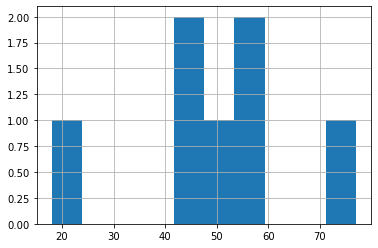

In [401]:
import matplotlib.pyplot as plt

dog_pack["height_cm"].hist()
plt.show()

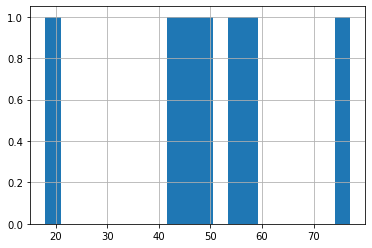

In [403]:
dog_pack["height_cm"].hist(bins=20)
plt.show()

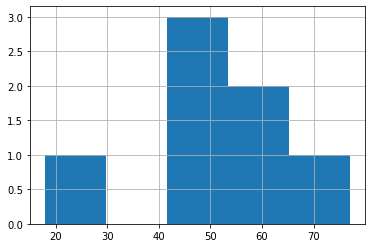

In [405]:
dog_pack["height_cm"].hist(bins=5)
plt.show()

### Bar plots

In [406]:
avg_weight_by_breed = dog_pack.groupby("breed")["weight_kg"].mean()
avg_weight_by_breed

breed
 Chihuahua       2
 Chow           22
 Labrador       27
 Poodle         23
 Schnauzer      17
 St. Bernard    74
Name: weight_kg, dtype: int64

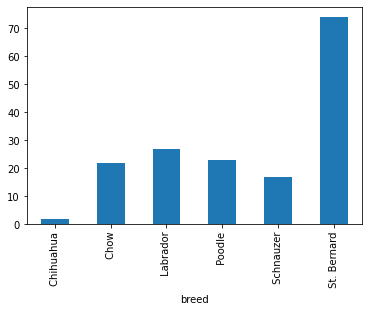

In [407]:
avg_weight_by_breed.plot(kind="bar")
plt.show()

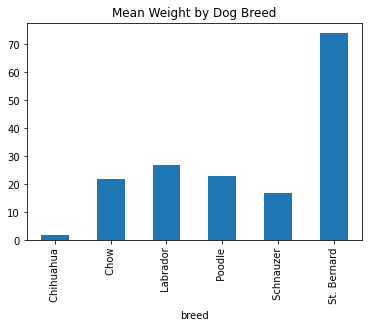

In [408]:
avg_weight_by_breed.plot(kind="bar",title="Mean Weight by Dog Breed")
plt.show()

### Line plots

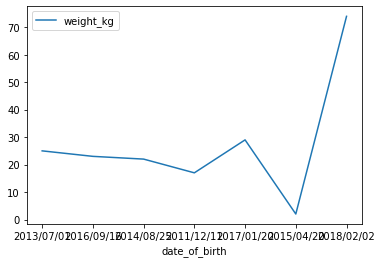

In [411]:
dog_pack.plot(x="date_of_birth",y="weight_kg",kind="line")
plt.show()

### Rotating axis labels

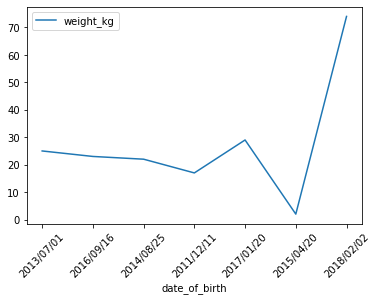

In [415]:
dog_pack.plot(x="date_of_birth",y="weight_kg",kind="line", rot = 45)
plt.show()

### Scatter plots